In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Mean Absolute Percentage Error
def calcula_mape(label, predictions):
    errors = np.abs(label - predictions)
    relative_errors = errors/np.abs(label)
    return np.mean(relative_errors) * 100


%matplotlib inline

df = pd.read_csv('data/insurance.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [56]:
df.shape

(1338, 7)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

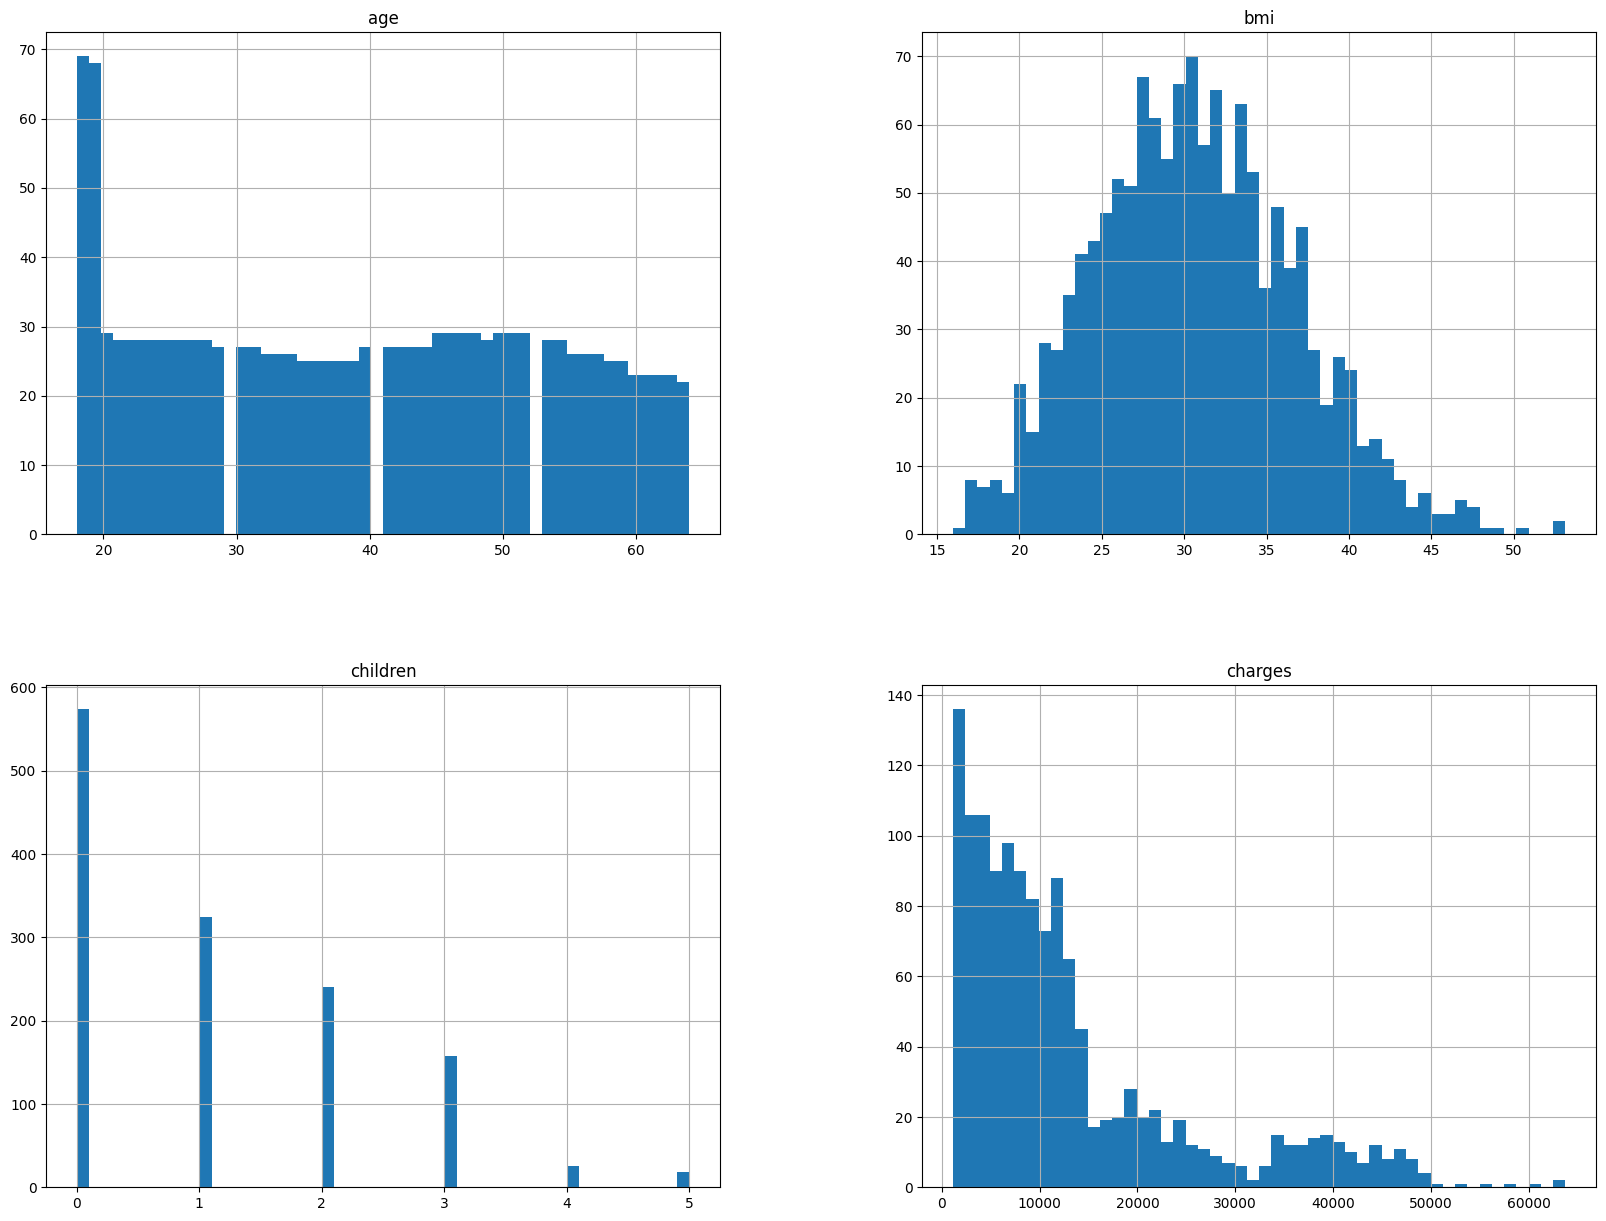

In [59]:
df.hist(bins=50, figsize=(20,15))

Transformando os dados para análise

In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse_output=False)

df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

one_hot_encoded_data =one_hot_encoder.fit_transform(df[['region']])
one_hot_encode_data_frame = pd.DataFrame(one_hot_encoded_data, columns=one_hot_encoder.get_feature_names_out(['region']))

df = pd.concat([df, one_hot_encode_data_frame], axis=1)
df = df.drop(columns=['region'])

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


<Axes: xlabel='bmi', ylabel='charges'>

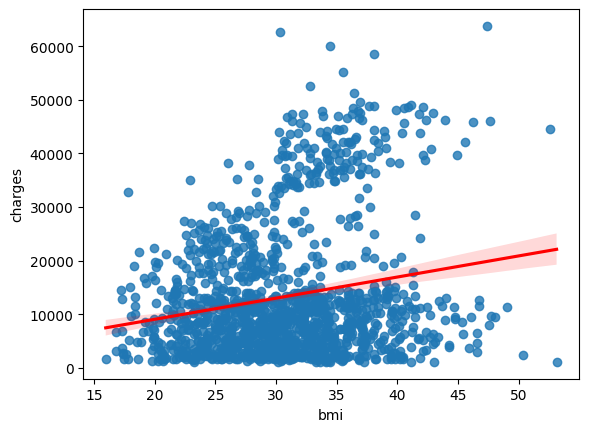

In [61]:
sns.regplot(x='bmi', y='charges', data=df, line_kws={'color':'red'})

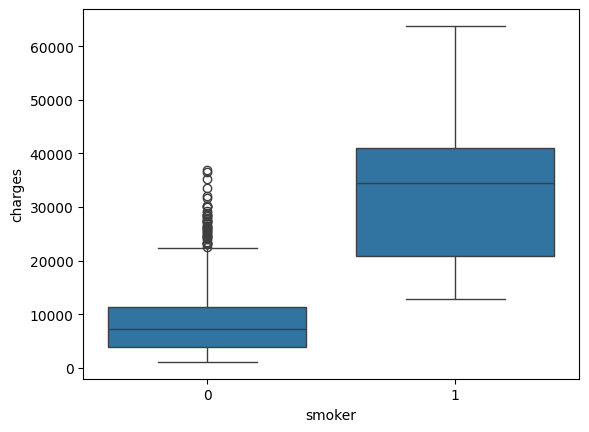

In [62]:
import seaborn as sns
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()

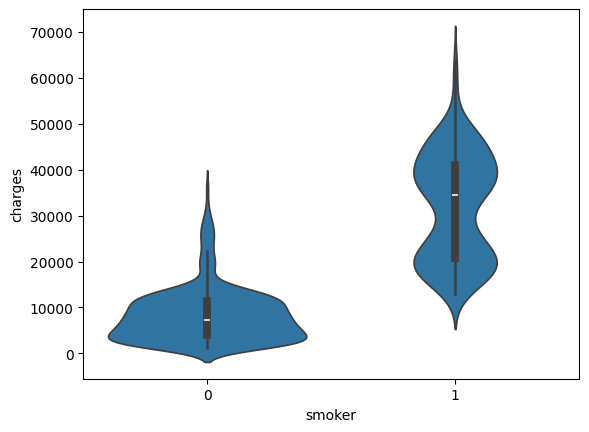

In [63]:
sns.violinplot(x='smoker', y='charges', data=df)
plt.show()

/home/godois/.asdf/installs/python/3.8.10/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/godois/.asdf/installs/python/3.8.10/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


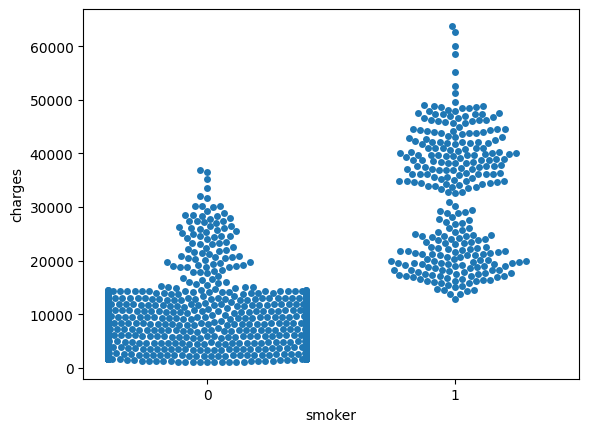

In [64]:
sns.swarmplot(x='smoker', y='charges', data=df)
plt.show()

Distribuição Idade e Gastos

<Axes: xlabel='age', ylabel='charges'>

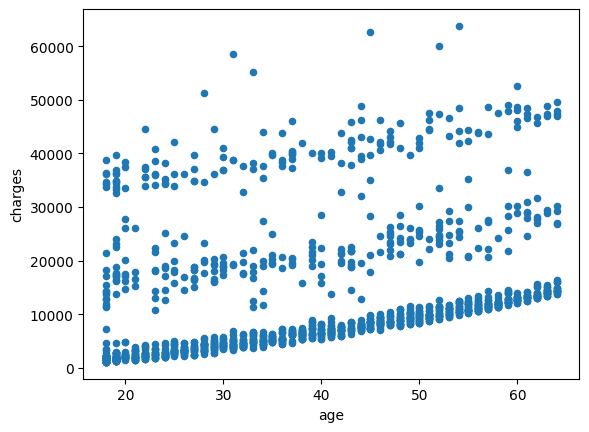

In [65]:
df.plot.scatter(x='age', y='charges')

Gráfico de relação entre BMI e CHARGES

<Axes: xlabel='bmi', ylabel='charges'>

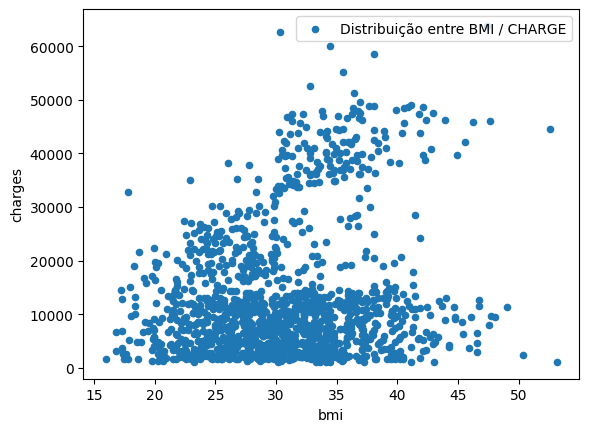

In [66]:
df.plot.scatter(x='bmi', y='charges', label='Distribuição entre BMI / CHARGE')

Gerando uma base de cópia para trabalho

In [67]:
cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest','charges']
df_full = df[cols].copy()
df_full.head()
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   region_northeast  1338 non-null   float64
 6   region_northwest  1338 non-null   float64
 7   region_southeast  1338 non-null   float64
 8   region_southwest  1338 non-null   float64
 9   charges           1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


In [68]:
df_full

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0,16884.92400
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0,1725.55230
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0,4449.46200
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0,21984.47061
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0.0,1.0,0.0,0.0,10600.54830
1334,18,0,31.920,0,0,1.0,0.0,0.0,0.0,2205.98080
1335,18,0,36.850,0,0,0.0,0.0,1.0,0.0,1629.83350
1336,21,0,25.800,0,0,0.0,0.0,0.0,1.0,2007.94500


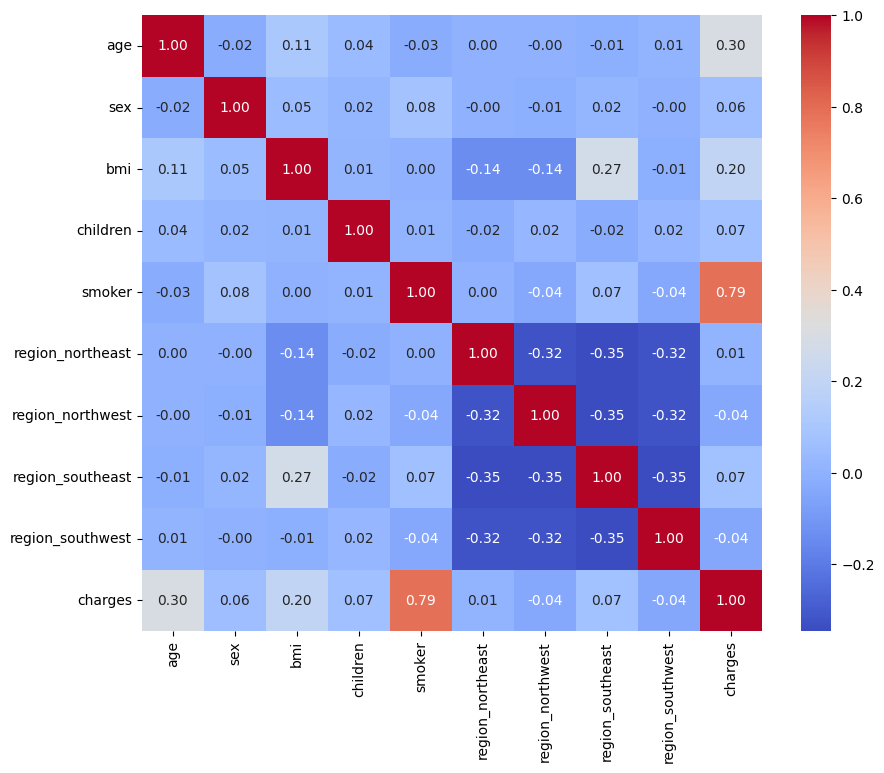

In [69]:
corr_matriz = df_full.corr()
df_full.corr()
plt.figure(figsize=(10, 8))

# Criando o mapa de calor da matriz de correlação
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Separação dos dados entre os dois eixos (x e y)

In [70]:
X = df_full.drop(columns="charges")
y = df_full['charges']

Geração dos dados de treino e teste

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() #chamando o metodo de padronização dos dados (média e std)
scaler.fit(X_train)# qual média e std será utilizado para o escalonamento

x_train_standard_scaled = scaler.transform(X_train)
x_test_standard_scaled  = scaler.transform(X_test)

print(f"treino: {len(x_train_standard_scaled)}")
print(f"test: {len(x_test_standard_scaled)}")

treino: 1070
test: 268


Aplicando regressao linear

In [72]:
lm = LinearRegression()
lm.fit(x_train_standard_scaled, y_train)

LinearRegression()

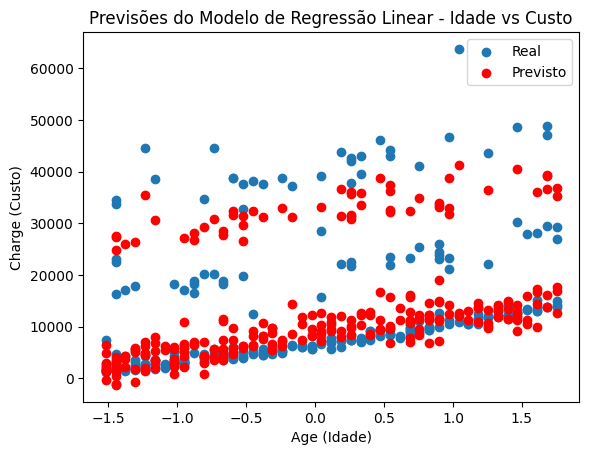

In [73]:
lm_predictions = lm.predict(x_test_standard_scaled)


plt.scatter(x_test_standard_scaled[:, 0], y_test, label='Real')
plt.scatter(x_test_standard_scaled[:, 0], lm_predictions, label='Previsto', color='red')
plt.xlabel('Age (Idade)')
plt.ylabel('Charge (Custo)')
plt.title('Previsões do Modelo de Regressão Linear - Idade vs Custo')
plt.legend()
plt.show()

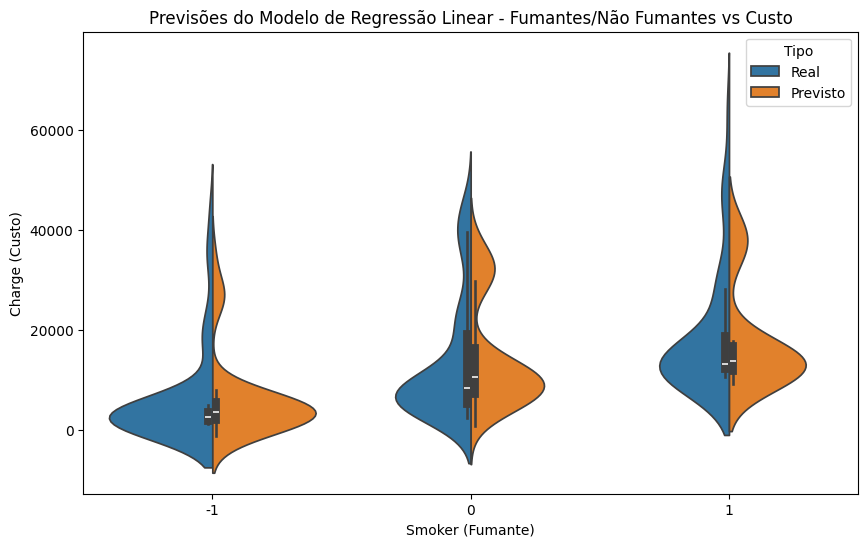

In [103]:
# Criando um DataFrame temporário para organizar os dados
results = pd.DataFrame({
    'smoker': x_test_standard_scaled[:, 0],  # Certifique-se de que 'smoker' está na coluna correta
    'Real': y_test,
    'Previsto': lm_predictions
})

# Convertendo 'smoker' para inteiro, se necessário
results['smoker'] = results['smoker'].astype(int)

# Reorganizando o DataFrame para formato longo (long format)
df_melted = pd.melt(results, id_vars=['smoker'], value_vars=['Real', 'Previsto'], var_name='Tipo', value_name='Custo')

# Plotando o violin plot com Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoker', y='Custo', hue='Tipo', data=df_melted, split=True)
plt.xlabel('Smoker (Fumante)')
plt.ylabel('Charge (Custo)')
plt.title('Previsões do Modelo de Regressão Linear - Fumantes/Não Fumantes vs Custo')
plt.legend(title='Tipo')
plt.show()


Validação Modelo Regressao Linear

In [75]:
# validação modelo Regressao Linear

# Quoeficiente de Determinacao
print('R^2: ', r2_score(y_test, lm_predictions))

# Erro médio absoluto
print('MAE: ', mean_absolute_error(y_test, lm_predictions))

# Erro medio quadratico
print('MSE: ', mean_squared_error(y_test, lm_predictions))

# Root Mean Squar Error (Erro quadrático médio) - Erro médio
print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm_predictions)))

# MAPE indica o percentual de erro do modelo
mape = calcula_mape(y_test, lm_predictions)
print(f"MAPE: {mape:.2f}%")


R^2:  0.7810553881326064
MAE:  4254.115948796576
MSE:  33990873.25937154
RMSE:  5830.16923076608
MAPE: 49.74%


Usando Árvore de decisao

In [82]:
from sklearn.tree import DecisionTreeRegressor

model_decision_tree = DecisionTreeRegressor(max_depth= 5)
model_decision_tree.fit(x_train_standard_scaled, y_train)


DecisionTreeRegressor(max_depth=5)

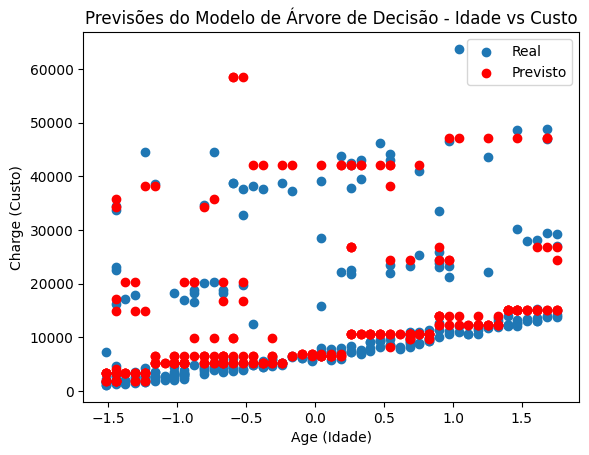

In [84]:
tree_predictions = model_decision_tree.predict(x_test_standard_scaled)

plt.scatter(x_test_standard_scaled[:, 0], y_test, label='Real')
plt.scatter(x_test_standard_scaled[:, 0], tree_predictions, label='Previsto', color='red')
plt.xlabel('Age (Idade)')
plt.ylabel('Charge (Custo)')
plt.title('Previsões do Modelo de Árvore de Decisão - Idade vs Custo')
plt.legend()
plt.show()

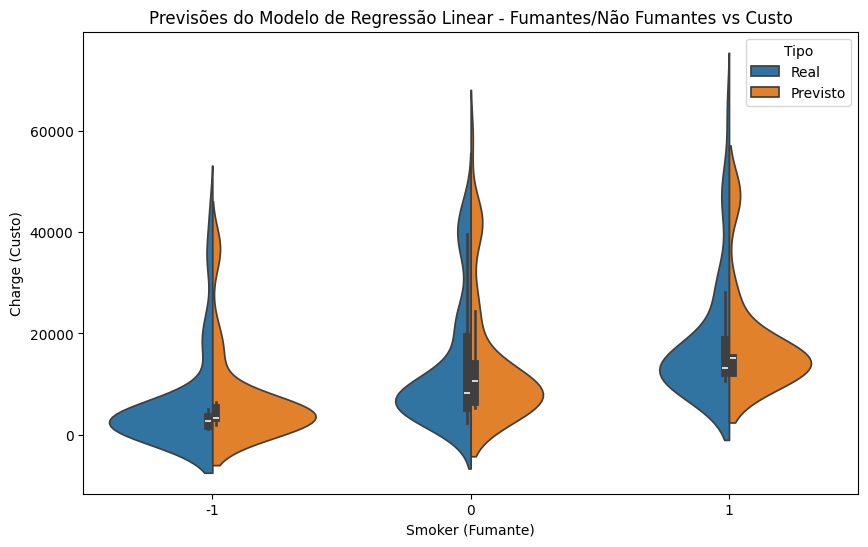

In [86]:
# Criando um DataFrame temporário para organizar os dados
results = pd.DataFrame({
    'smoker': x_test_standard_scaled[:, 0],  # Certifique-se de que 'smoker' está na coluna correta
    'Real': y_test,
    'Previsto': tree_predictions
})

# Convertendo 'smoker' para inteiro, se necessário
results['smoker'] = results['smoker'].astype(int)

# Reorganizando o DataFrame para formato longo (long format)
df_melted = pd.melt(results, id_vars=['smoker'], value_vars=['Real', 'Previsto'], var_name='Tipo', value_name='Custo')

# Plotando o violin plot com Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoker', y='Custo', hue='Tipo', data=df_melted, split=True)
plt.xlabel('Smoker (Fumante)')
plt.ylabel('Charge (Custo)')
plt.title('Previsões do Modelo de Regressão Linear - Fumantes/Não Fumantes vs Custo')
plt.legend(title='Tipo')
plt.show()

In [85]:
# validando decision tree

# Quoeficiente de Determinacao
print('R^2: ', r2_score(y_test, tree_predictions))

# Erro médio absoluto
print('MAE: ', mean_absolute_error(y_test, tree_predictions))

# Erro medio quadratico
print('MSE: ', mean_squared_error(y_test, tree_predictions))

# Root Mean Squar Error (Erro quadrático médio) - Erro médio
print('RMSE: ', np.sqrt(mean_squared_error(y_test, tree_predictions)))

# MAPE indica o percentual de erro do modelo
mape = calcula_mape(y_test, tree_predictions)
print(f"MAPE: {mape:.2f}%")


R^2:  0.8334428126395235
MAE:  2911.1600498786056
MSE:  25857792.05855163
RMSE:  5085.055757663983
MAPE: 34.55%


Grando a ML com Modelo Forest - aplicando as métricas indicadas pelo Grid no passo anterior

In [90]:
from sklearn.ensemble import RandomForestRegressor
forest2 = RandomForestRegressor(n_estimators= 100)

forest2.fit(x_train_standard_scaled, y_train)


RandomForestRegressor()

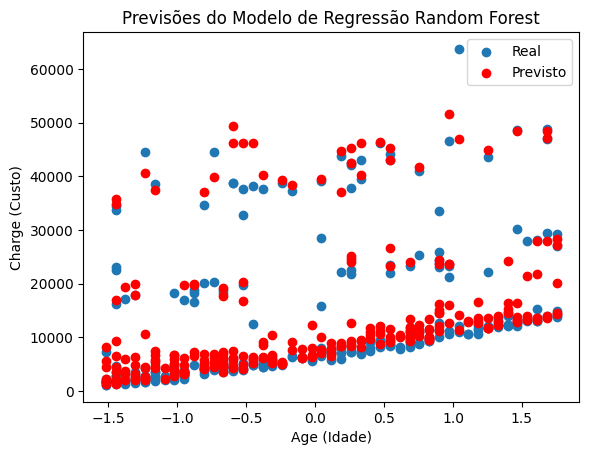

In [100]:

forest2_predictions = forest2.predict(x_test_standard_scaled)

plt.scatter(x_test_standard_scaled[:, 0], y_test, label='Real')
plt.scatter(x_test_standard_scaled[:, 0], forest2_predictions, label='Previsto', color='red')
plt.xlabel('Age (Idade)')
plt.ylabel('Charge (Custo)')
plt.title('Previsões do Modelo de Regressão Random Forest')
plt.legend()
plt.show()

In [101]:
# Validando modelo Forest

# Quoeficiente de Determinacao
print('R^2: ', r2_score(y_test, forest2_predictions))

# Erro médio absoluto
print('MAE: ', mean_absolute_error(y_test, forest2_predictions))

# Erro medio quadratico
print('MSE: ', mean_squared_error(y_test, forest2_predictions))

# Root Mean Squar Error (Erro quadrático médio) - Erro médio
print('RMSE: ', np.sqrt(mean_squared_error(y_test, forest2_predictions)))

# MAPE indica o percentual de erro do modelo
mape = calcula_mape(y_test, forest2_predictions)
print(f"MAPE: {mape:.2f}%")

R^2:  0.8598134760133737
MAE:  2557.414703981562
MSE:  21763780.021164816
RMSE:  4665.166665957907
MAPE: 30.72%


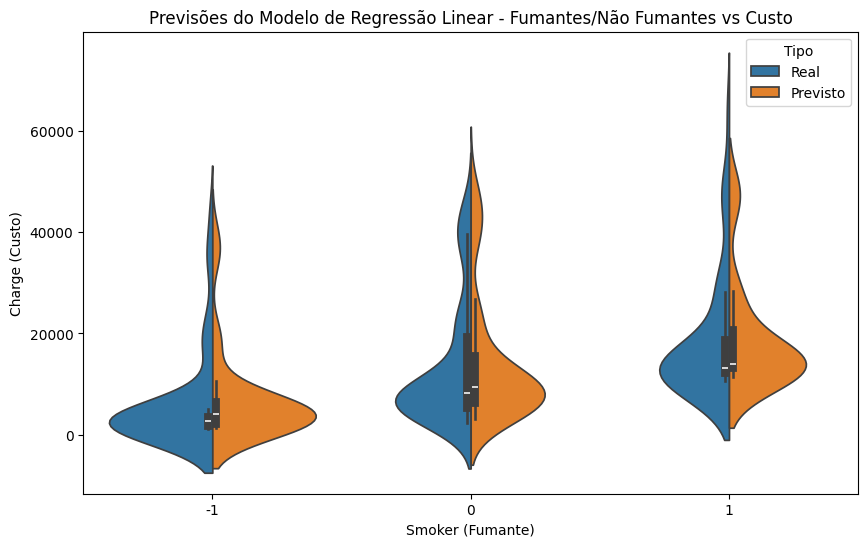

In [102]:
# Criando um DataFrame temporário para organizar os dados
results = pd.DataFrame({
    'smoker': x_test_standard_scaled[:, 0],  # Certifique-se de que 'smoker' está na coluna correta
    'Real': y_test,
    'Previsto': forest2_predictions
})

# Convertendo 'smoker' para inteiro, se necessário
results['smoker'] = results['smoker'].astype(int)

# Reorganizando o DataFrame para formato longo (long format)
df_melted = pd.melt(results, id_vars=['smoker'], value_vars=['Real', 'Previsto'], var_name='Tipo', value_name='Custo')

# Plotando o violin plot com Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoker', y='Custo', hue='Tipo', data=df_melted, split=True)
plt.xlabel('Smoker (Fumante)')
plt.ylabel('Charge (Custo)')
plt.title('Previsões do Modelo de Regressão Linear - Fumantes/Não Fumantes vs Custo')
plt.legend(title='Tipo')
plt.show()